# Marvin Maps
Marvin Maps is how you deal with the DAP MAPS FITS files easily.  You can retrieve maps in several ways.  Let's take a took. 

# From a Marvin Maps
Marvin Maps takes the same inputs as cube: filename, plateifu, or mangaid.  It also accepts keywords **bintype** and **template_kin**.  These uniquely define a DAP MAPS file.  By default, Marvin will load a MAPS file of **bintype=SPX** and **template_kin=GAU-MILESHC** for MPL-5.  For MPL-4, the defaults are **bintype=NONE**, and **template_kin=MIUSCAT-THIN**.

In [1]:
# import the maps
from marvin.tools.maps import Maps

# Load a MPL-5 map
mapfile = '/Users/Brian/Work/Manga/analysis/v2_0_1/2.0.2/SPX-GAU-MILESHC/8485/1901/manga-8485-1901-MAPS-SPX-GAU-MILESHC.fits.gz'
# Let's get a default map of

maps = Maps(filename=mapfile)
print(maps)

INFO: No release version set. Setting default to MPL-6
         release to MPL-5
<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='file', bintype='SPX', template='GAU-MILESHC')>


Once you have a maps object, you can access the raw maps file and header and extensions via **maps.header** and **maps.data**.  Alternatively, you can access individual maps using the **getMap** method.  **getMap** works by specifying a parameter and a channel.  The parameter and channels names are equivalent to those found in the MAPS FITS extensions and headers, albeit lowercased. 

In [2]:
# Let's grab the H-alpha flux emission line map
haflux = maps.getMap('emline_gflux', channel='ha_6564')
print(haflux)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 1e-17 erg / (cm2 s spaxel)


We can easily plot the map using the internal plot function.  Currently maps are plotted using some default Matplotlib color schemes and scaling.  

<IPython.core.display.Javascript object>


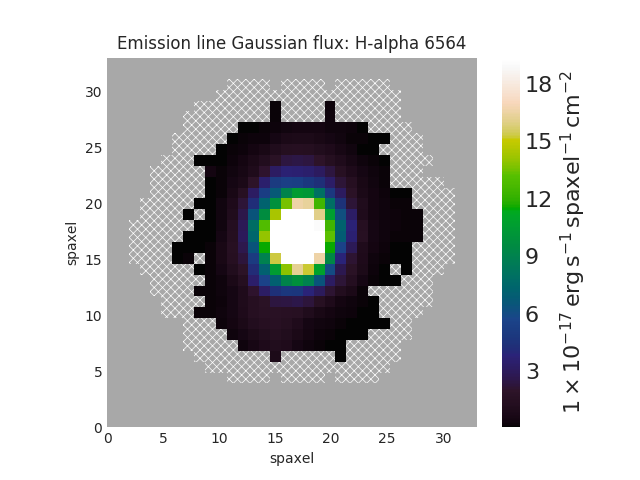

(<matplotlib.figure.Figure at 0x120278750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120278f10>)

In [3]:
# turn on interactive plotting
%matplotlib notebook

# let's plot it
haflux.plot()

**Try Yourself** Now try grabbing and plotting the map for stellar velocity in the cell below.

You can access the individual values, ivar, and mask for your map via the **.value**, **.ivar**, and **.mask** attributes.  These are 2d-array numpy arrays.

In [4]:
haflux.value, haflux.mask

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        ..., 
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843],
        [1073741843, 1073741843, 1073741843, ..., 1073741843, 1073741843,
         1073741843]], dtype=int32))

Let's replot the Halpha flux map but exclude all regions that have a non-zero mask. We need the numpy Python package for this.

('min', 0.037898785996023081, 'max', 31.475419531155001)
         removed after 2019/01.


<IPython.core.display.Javascript object>


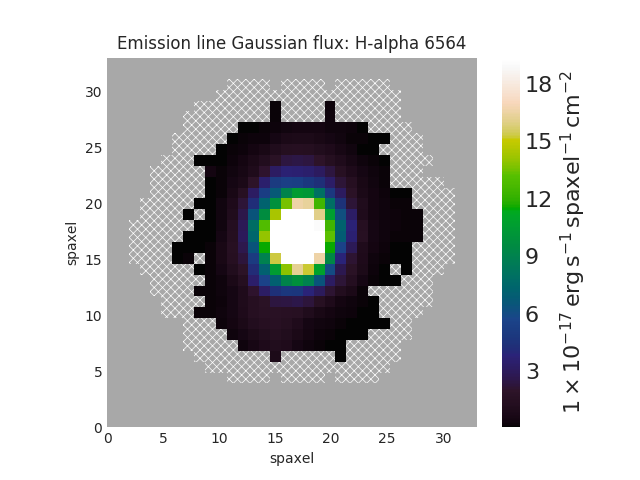

(<matplotlib.figure.Figure at 0x1217a3690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1217a3d50>)

In [5]:
import numpy as np
# select the locations where the mask is non-zero
badvals = np.where(haflux.mask > 0)
# set those values to a numpy nan. 
haflux.value[badvals] = np.nan
# check the min and max
print('min', np.nanmin(haflux.value), 'max', np.nanmax(haflux.value))
haflux.plot()

From the maps object, we can also easily plot the ratio between two maps, e.g. emission-line ratios, by dividing the two maps.  Map arithmetic is built into Marvin.  Map arithmetic produces Enhanced Maps, and behave the same as any other Map, so you can access their array values or plot them

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


<IPython.core.display.Javascript object>


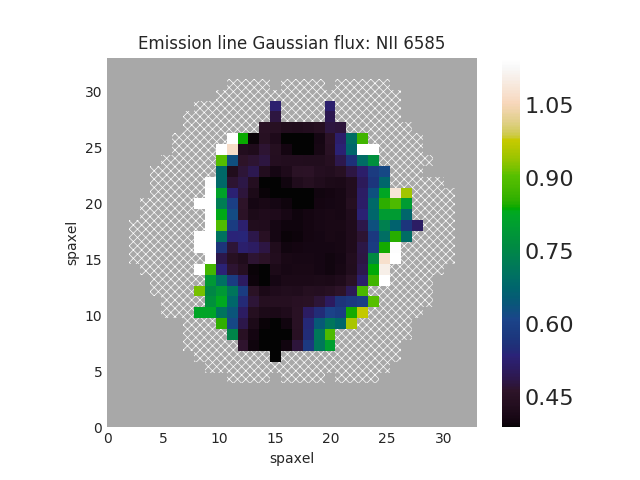

(<matplotlib.figure.Figure at 0x1225de790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1225deed0>)

In [8]:
# Let's look at the NII-to-Halpha emission-line ratio map
niiha = maps.emline_gflux_nii_6585 / maps.emline_gflux_ha_6564
print(niiha)
niiha.plot()

**Try Yourself** Modify the above to display the map for the emission-line ratio OIII/Hbeta

# From a Marvin Cube

In [9]:
# import the Cube tool
from marvin.tools.cube import Cube

# point to your file
filename ='/Users/Brian/Work/Manga/redux/v2_0_1/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'

# get a cube
cube = Cube(filename=filename)
print(cube)

         release to MPL-5
<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>


Once we have a cube, we can get its maps using the **getMaps** method.  getMaps is just a wrapper to the Marvin Maps Tool.  Once we have the maps, we can do all the same things as before.

In [10]:
maps = cube.getMaps()
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='db', bintype='SPX', template='GAU-MILESHC')>
